# **Module**: Univariate Statistical Process Monitoring
## **Lecture**: Assessing Control Chart Performance
### *Topic*:  FAR and MDR computations 

In [25]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

In [26]:
# ==================================================================================
#                        Generate fault-free samples
# ==================================================================================

> ##### we will start with generating some fault-free samples to represent the model-training dataset

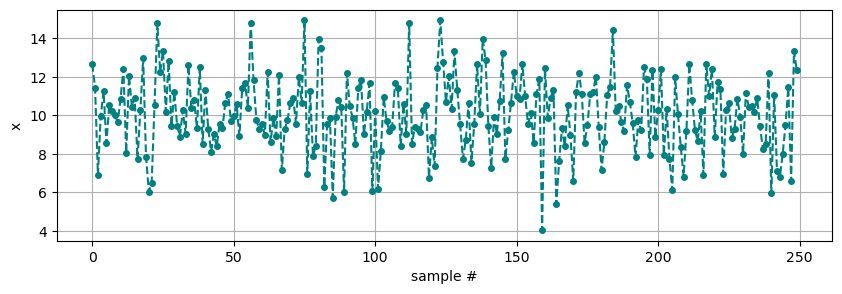

In [27]:
# generate NOC (normal operation condition) data
N = 250 # 250 observation samples
x_faultFree = np.random.normal(loc=10, scale=2, size=N) # mean=10; standard deviation=2

# plot NOC data
plt.figure(figsize=(10,3))
plt.plot(x_faultFree,'--', marker='o', markersize=4, color='teal')
plt.xlabel('sample #'), plt.ylabel('x')
plt.grid()
plt.show()


In [28]:
# ==================================================================================
#                                    Model Training
# ==================================================================================

> ##### we will use the NOC data to estimate the CUSUM control chart parameters, which are the mean (mu) and standard deviation (sigma) of the signal, and the Control limit (H)

In [29]:
# estimate CUSUM model parameters and plot control chart for NOC data
mu, sigma = np.mean(x_faultFree), np.std(x_faultFree)
k = 0.25*sigma
H = 5*sigma

print(f'CUSUM chart control limit: {H}')

CUSUM chart control limit: 9.765931343973723


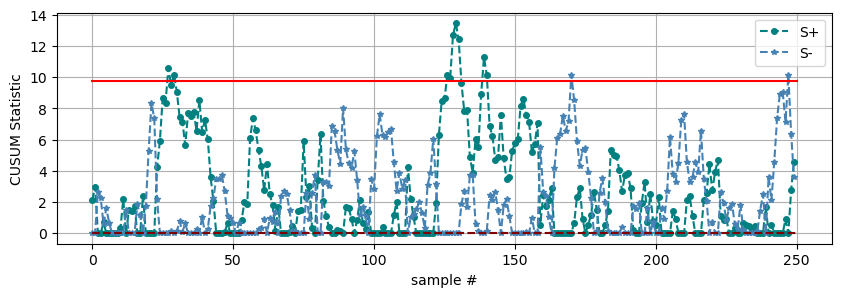

In [30]:
# compute CUSUM statistic for NOC data
S_positive = np.zeros((len(x_faultFree),))
S_negative = np.zeros((len(x_faultFree),))

for i in range(len(x_faultFree)):
    if i==0:
        S_positive[i] = np.max([0, x_faultFree[i]-(mu+k)])
        S_negative[i] = np.max([0, (mu-k)-x_faultFree[i]])  
    else:
        S_positive[i] = np.max([0, x_faultFree[i]-(mu+k) + S_positive[i-1]])
        S_negative[i] = np.max([0, (mu-k)-x_faultFree[i] + S_negative[i-1]])

# plot control chart for NOC data
plt.figure(figsize=(10,3))
plt.plot(S_positive,'--',marker='o', markersize=4, color='teal', label='S+')
plt.plot(S_negative,'--',marker='*', markersize=4, color='steelblue', label='S-')
plt.plot([0,N],[H,H], color='red')
plt.plot([0,N],[0,0], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('CUSUM Statistic')
plt.grid(), plt.legend()
plt.show()

In [31]:
# ==================================================================================
#                      Compute False Alarm Rate for NOC dataset
# ==================================================================================

In [32]:
out_of_control_flags = np.logical_or((S_positive>H), (S_negative>H))
N_out_of_control_preds = np.sum(out_of_control_flags)
FAR = 100*N_out_of_control_preds/N

print(f'FAR for NOC samples = {FAR}%')

FAR for NOC samples = 4.4%


In [33]:
# ==================================================================================
#               Generate faulty test samples and plot on control chart
# ==================================================================================

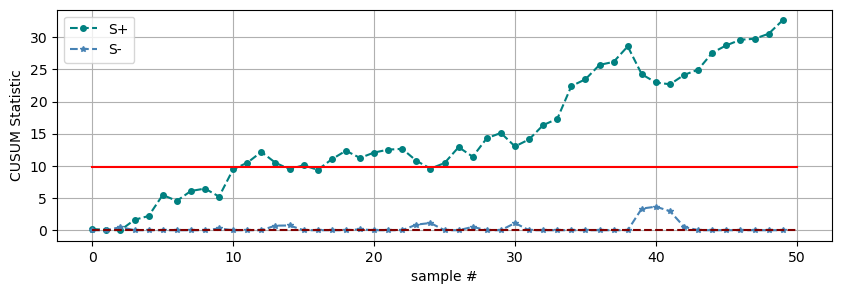

In [34]:
# faulty data
N_faulty = 50 # 50 observation samples
x_faulty = np.random.normal(loc=11, scale=2, size=N_faulty) # mean=10+0.5*2; standard deviation=2

# CUSUM statistic for faulty data
S_positive_test = np.zeros((len(x_faulty),))
S_negative_test = np.zeros((len(x_faulty),))

for i in range(len(x_faulty)):
     if i==0:
        S_positive_test[i] = np.max([0, x_faulty[i]-(mu+k)])
        S_negative_test[i] = np.max([0, (mu-k)-x_faulty[i]]) 
     else:
        S_positive_test[i] = np.max([0, x_faulty[i]-(mu+k) + S_positive_test[i-1]])
        S_negative_test[i] = np.max([0, (mu-k)-x_faulty[i] + S_negative_test[i-1]])

# plot control chart for test data
plt.figure(figsize=(10,3))
plt.plot(S_positive_test,'--',marker='o', markersize=4, color='teal', label='S+')
plt.plot(S_negative_test,'--',marker='*', markersize=4, color='steelblue', label='S-')
plt.plot([0,N_faulty],[H,H], color='red')
plt.plot([0,N_faulty],[0,0], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('CUSUM Statistic')
plt.grid(), plt.legend()
plt.show()

In [35]:
# ==================================================================================
#                      Compute Missed Detection Rate for test dataset
# ==================================================================================

In [36]:
in_control_flags = np.logical_and((S_positive_test<=H), (S_negative_test<=H))
N_in_control_preds = np.sum(in_control_flags)
MDR = 100*N_in_control_preds/N_faulty

print(f'MDR for test samples = {MDR}%')

MDR for test samples = 28.0%
